# Finding eigenenergies and eigenfunctions for structures in 1D

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

Solving Schrodinger equation:
$$-\frac{\hbar}{2m}\frac{\partial^2\psi(x)}{\partial x^2}=(E-V(x))\psi(x) $$
Boundary condition:
$$\psi(0)=\psi(a)=0$$

In this method we assume that $\hbar =1$, $m_e$=1 and Schrodinger equation can be multiplied by m:

$$-\frac{1}{2}\frac{\partial^2\psi(x)}{\partial x^2}=m(E-V(x))\psi(x) $$

To make easier solving this equation we put variable y=x/a. Then boundary conditions:

$$\psi(y=0)=\psi(y=a/a=1)=0$$

We can aproximate differential fragment as difference one (Crank-Nicolson's scheme):

$$\frac{\partial^2\psi(x)}{\partial x^2}_{x=j\Delta x}=\frac{\psi_{j+1}-2\psi_{j}+\psi_{j-1}}{\Delta x^2}$$

And then we can write Schrodinger equation as:

$$-\frac{1}{2}\frac{\psi_{j+1}-2\psi_{j}+\psi_{j-1}}{\Delta y^2}=ma^2(E-V_j)\psi_j $$

$$-\frac{1}{2\Delta y^2}\psi_{j+1}+\left(\frac{1}{\Delta y^2}+ma^2V_j\right)\psi_j - \frac{1}{2\Delta y^2}\psi_{j-1}=ma^2E\psi_j$$

We can write solutions (linear equations) as tridiagonal matrix:

$$
 \begin{bmatrix}
   a_{1} & b & 0 & 0&0\\ 
   b& a_{2} & b & 0&0\\ 
   0& b &  a_{3} & \ddots&...\\ 
   ...& \ddots &  \ddots & \ddots&b\\ 
   0& 0 &0& b & a_{N-1} 
 \end{bmatrix} 
 \begin{bmatrix}
   \psi_{1}\\ 
   \psi_2\\ 
   \psi_3\\ 
   ...\\ 
   \psi_{N-1} 
 \end{bmatrix} = ma^2E\begin{bmatrix}
   \psi_{1}\\ 
   \psi_2\\ 
   \psi_3\\ 
   ...\\ 
   \psi_{N-1} 
 \end{bmatrix}
$$
where $a_n =\frac{1}{\Delta y^2}+ma^2V_n(y)$, $b=-\frac{1}{2\Delta y^2}$

In [9]:
a = 10                     # koniec przedziału
me = 9.1*10**(-31)         #mass of electron
hbar =  1.054*10**(-34)                  #(theoretically) Planck's constans
N = 1000                   # no of Points
dy = 1/N
y = np.linspace(0, 1, N+1) # tablica N+1 elementów (uwzględniamy 0)

### $$\text{Example 1- Infinite well}$$

In [10]:
#funkcja potencjału dla nieskończonej studni

def potential1(y):
    return 0*y

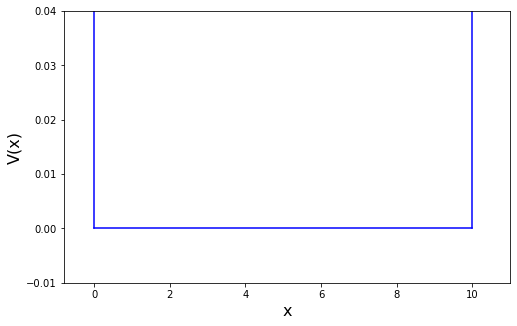

In [11]:
plt.figure(figsize=(8,5))
plt.plot(y*a,potential1(y*a)/(a**2*me), color = 'b')
plt.plot([0,0],[0,1000], color = 'b')
plt.plot([10,10],[0,1000], color = 'b')
plt.axis([-0.8,11.01,-0.01,0.04])
plt.xlabel("x", fontsize=16)
plt.ylabel("V(x)", fontsize=16)
plt.show()

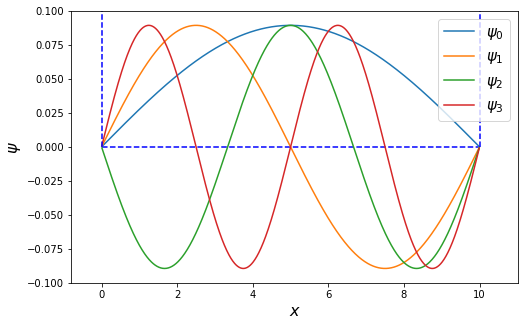

In [12]:
d = 1/dy**2 + potential1(y)[1:-1]
e = -1/(2*dy**2) * np.ones(N-2) #lista samych 1
w1, v1 = eigh_tridiagonal(d, e)
# v- funkcje własne
# w - poziomy energii

plt.figure(figsize=(8,5))
plt.plot(y*a,potential1(y*a)/(a**2*me), "--", color = 'b')
plt.plot(y[1:-1]*a, v1.T[0]*2, label="$\psi_0$")
plt.plot(y[1:-1]*a, v1.T[1]*2, label="$\psi_1$")
plt.plot(y[1:-1]*a, v1.T[2]*2, label="$\psi_2$")
plt.plot(y[1:-1]*a, v1.T[3]*2, label="$\psi_3$")
plt.plot([0,0],[0,1000], "--",color = 'b')
plt.plot([10,10],[0,1000],"--", color = 'b')
plt.axis([-0.8,11.01,-0.1,0.1])
plt.ylabel('$\psi$', fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.legend(fontsize=15)
plt.show()

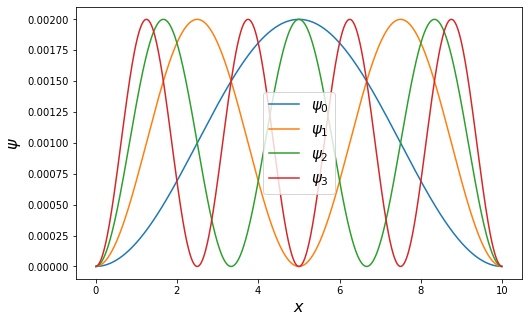

In [13]:
plt.figure(figsize=(8,5))
plt.plot(y[1:-1]*a, v1.T[0]**2, label="$\psi_0$")
plt.plot(y[1:-1]*a, v1.T[1]**2, label="$\psi_1$")
plt.plot(y[1:-1]*a, v1.T[2]**2, label="$\psi_2$")
plt.plot(y[1:-1]*a, v1.T[3]**2, label="$\psi_3$")
plt.ylabel('$\psi$', fontsize=16)
plt.xlabel('$x$', fontsize=16)
#plt.axis([-1,11.])
plt.legend(fontsize=15)
plt.show()

Energie

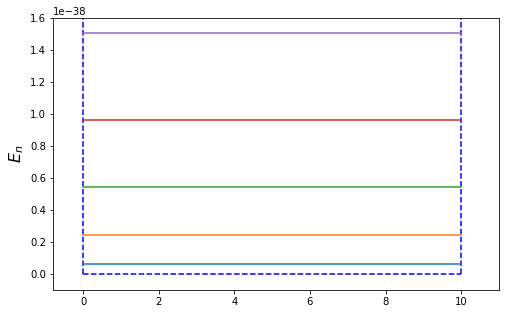

In [14]:
plt.figure(figsize=(8,5))
plt.plot(y*a,potential1(y*a)/(a**2*me), "--", color = 'b')
plt.plot([0,0],[0,1000], "--",color = 'b')
plt.plot([10,10],[0,1000],"--", color = 'b')
plt.plot([0,10],[w1[0]*hbar**2/(me*a**2),w1[0]*hbar**2/(me*a**2)])
plt.plot([0,10],[w1[1]*hbar**2/(me*a**2),w1[1]*hbar**2/(me*a**2)])
plt.plot([0,10],[w1[2]*hbar**2/(me*a**2),w1[2]*hbar**2/(me*a**2)])
plt.plot([0,10],[w1[3]*hbar**2/(me*a**2),w1[3]*hbar**2/(me*a**2)])
plt.plot([0,10],[w1[4]*hbar**2/(me*a**2),w1[4]*hbar**2/(me*a**2)])
plt.ylabel('$E_n$', fontsize=16)
plt.axis([-0.8,11.01,-10**(-39),1.6*10**(-38)])
plt.show()

We know that the energy of particle in infinite well:
$$E_n = \frac{n^2\pi^2\hbar^2}{2m_ea^2}$$
Let's check our numerical calculation:

In [15]:
string1 = "Energy E0 from known equation: " + str(np.pi**2*hbar**2/(2*me*a**2))
string2 = "Energy E0 from matrix: " + str(w1[0]*hbar**2/(me*a**2))
print(string1)
print(string2)

Energy E0 from known equation: 6.02434145211021e-40
Energy E0 from matrix: 6.024336497476523e-40


### $$\text{Example 2- square potential}$$

In [16]:
def potential2(y):
    return (y-5)**2

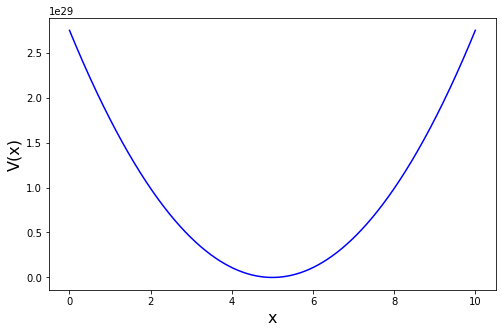

In [17]:
plt.figure(figsize=(8,5))
plt.plot(y*a,potential2(y*a)/(a**2*me), color = 'b')
plt.xlabel("x", fontsize=16)
plt.ylabel("V(x)", fontsize=16)
plt.show()

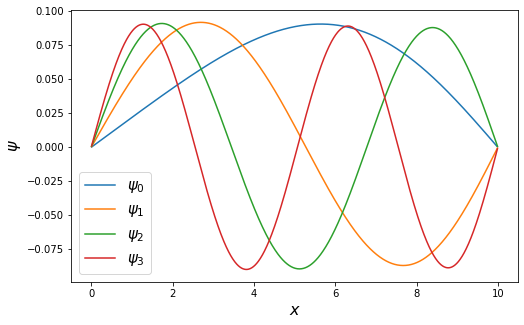

In [18]:
d2 = 1/dy**2 + potential2(y)[1:-1]
e2 = -1/(2*dy**2) * np.ones(N-2)
w2, v2 = eigh_tridiagonal(d2, e2)

plt.figure(figsize=(8,5))
plt.plot(y[1:-1]*a, v2.T[0]*2, label="$\psi_0$")
plt.plot(y[1:-1]*a, v2.T[1]*2, label="$\psi_1$")
plt.plot(y[1:-1]*a, v2.T[2]*2, label="$\psi_2$")
plt.plot(y[1:-1]*a, v2.T[3]*2, label="$\psi_3$")
plt.ylabel('$\psi$', fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.legend(fontsize=15)
plt.show()

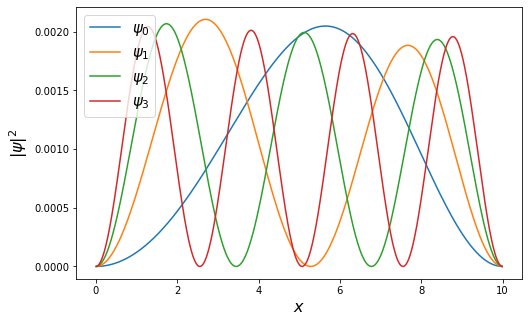

In [19]:
plt.figure(figsize=(8,5))
plt.plot(y[1:-1]*a, v2.T[0]**2, label="$\psi_0$")
plt.plot(y[1:-1]*a, v2.T[1]**2, label="$\psi_1$")
plt.plot(y[1:-1]*a, v2.T[2]**2, label="$\psi_2$")
plt.plot(y[1:-1]*a, v2.T[3]**2, label="$\psi_3$")
plt.ylabel('$|\psi|^2$', fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.legend(fontsize=15)
plt.show()

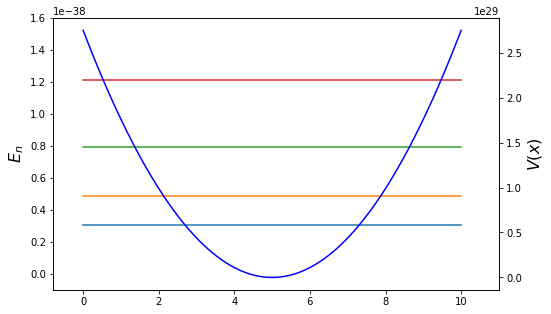

(3.0570523196629045e-39, 4.896682135966805e-39, 7.9072925528796e-39)

In [20]:
fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

ax1.plot([0,10],[w2[0]*hbar**2/(me*a**2),w2[0]*hbar**2/(me*a**2)])
ax1.plot([0,10],[w2[1]*hbar**2/(me*a**2),w2[1]*hbar**2/(me*a**2)])
ax1.plot([0,10],[w2[2]*hbar**2/(me*a**2),w2[2]*hbar**2/(me*a**2)])
ax1.plot([0,10],[w2[3]*hbar**2/(me*a**2),w2[3]*hbar**2/(me*a**2)])
ax1.plot([0,10],[w2[4]*hbar**2/(me*a**2),w2[4]*hbar**2/(me*a**2)])
ax1.set_ylabel('$E_n$', fontsize=16)
ax2.set_ylabel('$V(x)$', fontsize=16)
ax1.axis([-0.8,11.01,-10**(-39),1.6*10**(-38)])
ax2.plot(y*a,potential2(y*a)/(a**2*me), color = 'b')

plt.show()
w2[0]*hbar**2/(me*a**2),w2[1]*hbar**2/(me*a**2),w2[2]*hbar**2/(me*a**2)


### $$\text{Example 3- sinus function}$$

In [21]:
def potential3(y):
    return 1000*np.sin(20*y) * y**4 

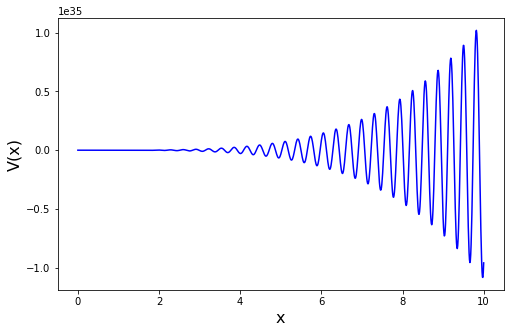

In [22]:
plt.figure(figsize=(8,5))
plt.plot(y*a,potential3(y*a)/(a**2*me), color = 'b')
plt.xlabel("x", fontsize=16)
plt.ylabel("V(x)", fontsize=16)
plt.show()

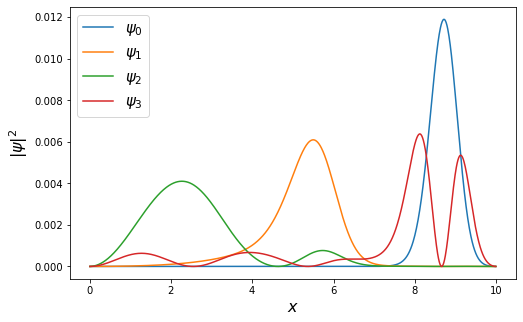

In [23]:
d3 = 1/dy**2 + potential3(y)[1:-1]
e3 = -1/(2*dy**2) * np.ones(N-2)
w3, v3 = eigh_tridiagonal(d3, e3)

plt.figure(figsize=(8,5))
plt.plot(y[1:-1]*a, v3.T[0]**2, label="$\psi_0$")
plt.plot(y[1:-1]*a, v3.T[1]**2, label="$\psi_1$")
plt.plot(y[1:-1]*a, v3.T[2]**2, label="$\psi_2$")
plt.plot(y[1:-1]*a, v3.T[3]**2, label="$\psi_3$")
plt.ylabel('$|\psi|^2$', fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.legend(fontsize=15)
plt.show()

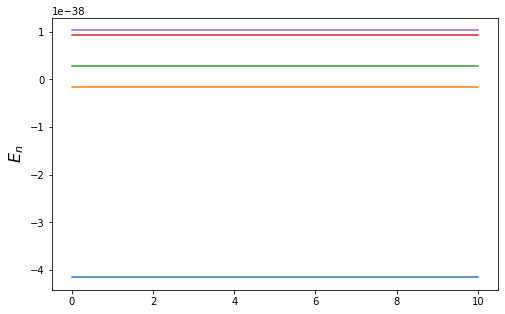

(-4.153078749087366e-38, -1.6044422283019596e-39, 2.849366547202997e-39)

In [24]:
plt.figure(figsize=(8,5))
plt.plot([0,10],[w3[0]*hbar**2/(me*a**2),w3[0]*hbar**2/(me*a**2)])
plt.plot([0,10],[w3[1]*hbar**2/(me*a**2),w3[1]*hbar**2/(me*a**2)])
plt.plot([0,10],[w3[2]*hbar**2/(me*a**2),w3[2]*hbar**2/(me*a**2)])
plt.plot([0,10],[w3[3]*hbar**2/(me*a**2),w3[3]*hbar**2/(me*a**2)])
plt.plot([0,10],[w3[4]*hbar**2/(me*a**2),w3[4]*hbar**2/(me*a**2)])
plt.ylabel('$E_n$', fontsize=16)
plt.show()
w3[0]*hbar**2/(me*a**2),w3[1]*hbar**2/(me*a**2),w3[2]*hbar**2/(me*a**2)

### $$\text{Example 4- polynomial function}$$

In [25]:
def potential4(y):
    return 30*y*y*y+20*y*y+99*y

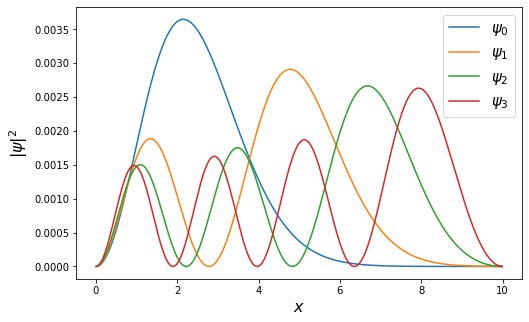

In [26]:
d4 = 1/dy**2 + potential4(y)[1:-1]
e4 = -1/(2*dy**2) * np.ones(N-2)
w4, v4 = eigh_tridiagonal(d4, e4)

plt.figure(figsize=(8,5))
plt.plot(y[1:-1]*a, v4.T[0]**2, label="$\psi_0$")
plt.plot(y[1:-1]*a, v4.T[1]**2, label="$\psi_1$")
plt.plot(y[1:-1]*a, v4.T[2]**2, label="$\psi_2$")
plt.plot(y[1:-1]*a, v4.T[3]**2, label="$\psi_3$")
plt.ylabel('$|\psi|^2$', fontsize=16)
plt.xlabel('$x$', fontsize=16)
plt.legend(fontsize=15)
plt.show()

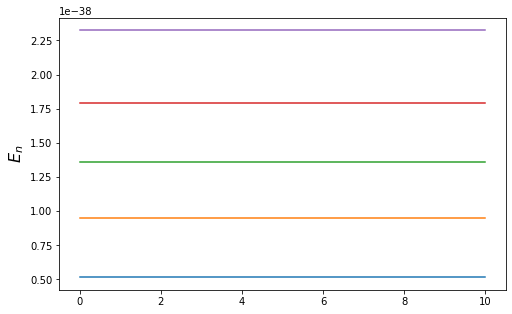

(5.147369166423394e-39, 9.522766703675147e-39, 1.3575361521962447e-38)

In [27]:
plt.figure(figsize=(8,5))
plt.plot([0,10],[w4[0]*hbar**2/(me*a**2),w4[0]*hbar**2/(me*a**2)])
plt.plot([0,10],[w4[1]*hbar**2/(me*a**2),w4[1]*hbar**2/(me*a**2)])
plt.plot([0,10],[w4[2]*hbar**2/(me*a**2),w4[2]*hbar**2/(me*a**2)])
plt.plot([0,10],[w4[3]*hbar**2/(me*a**2),w4[3]*hbar**2/(me*a**2)])
plt.plot([0,10],[w4[4]*hbar**2/(me*a**2),w4[4]*hbar**2/(me*a**2)])
plt.ylabel('$E_n$', fontsize=16)
#plt.axis([-0.8,11.01,0,2.1*10**(-29)])
plt.show()
w4[0]*hbar**2/(me*a**2),w4[1]*hbar**2/(me*a**2),w4[2]*hbar**2/(me*a**2)

###  $$\text{Example 5- quantum oscilator}$$
$$V(x)=\frac{1}{2}m_ew_0^2x^2$$

In [54]:
wo = 10**16
aa = (hbar/(me*wo))**(1/2)
k = me*wo*wo

def potential5(y):
    return (1/2)*k*(y)**2

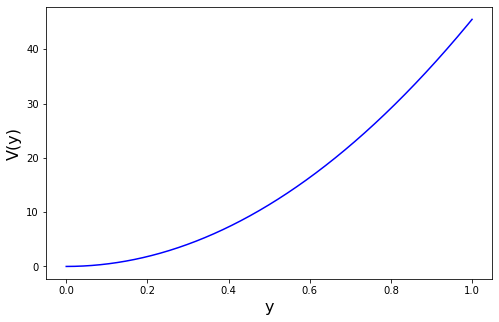

In [55]:
plt.figure(figsize=(8,5))
plt.plot(y,potential5(y), color = 'b')
plt.xlabel("y", fontsize=16)
plt.ylabel("V(y)", fontsize=16)
#plt.axis([-0.8,11.1,0,6*10**(15)])
plt.show()

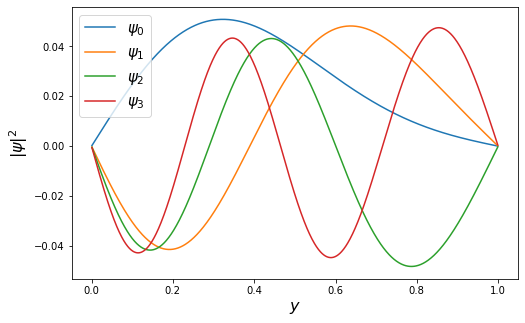

In [56]:
d5 = 1/dy**2 + potential5(y)[1:-1]
e5 = -1/(2*dy**2) * np.ones(N-2)
w5, v5 = eigh_tridiagonal(d5, e5)

plt.figure(figsize=(8,5))
plt.plot(y[1:-1], v5.T[0], label="$\psi_0$")
plt.plot(y[1:-1], v5.T[1], label="$\psi_1$")
plt.plot(y[1:-1], v5.T[2], label="$\psi_2$")
plt.plot(y[1:-1], v5.T[3], label="$\psi_3$")
plt.ylabel('$|\psi|^2$', fontsize=16)
plt.xlabel('$y$', fontsize=16)
plt.legend(fontsize=15)
plt.show()

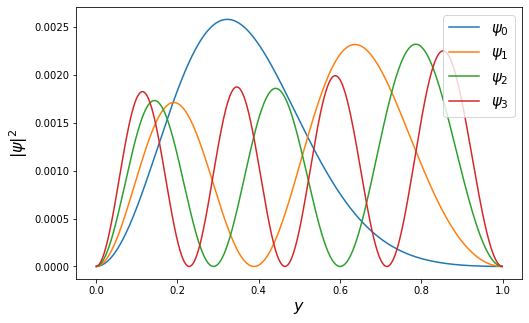

In [57]:
plt.figure(figsize=(8,5))
plt.plot(y[1:-1], v5.T[0]**2, label="$\psi_0$")
plt.plot(y[1:-1], v5.T[1]**2, label="$\psi_1$")
plt.plot(y[1:-1], v5.T[2]**2, label="$\psi_2$")
plt.plot(y[1:-1], v5.T[3]**2, label="$\psi_3$")
plt.ylabel('$|\psi|^2$', fontsize=16)
plt.xlabel('$y$', fontsize=16)
plt.legend(fontsize=15)
plt.show()

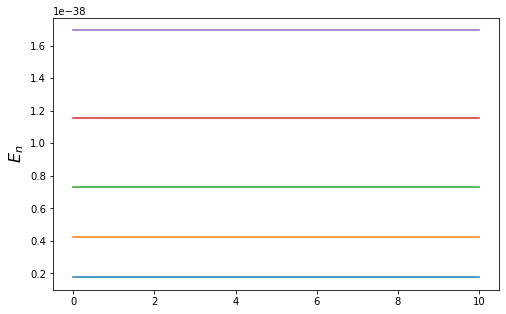

1.751399576870368e-39 4.2173448171765545e-39 7.328343456286942e-39
5.27e-19 1.581e-18 2.635e-18
hbar*wo = 1.054e-18


In [70]:
plt.figure(figsize=(8,5))
plt.plot([0,10],[w5[0]*hbar**2/(me*a**2),w5[0]*hbar**2/(me*a**2)])
plt.plot([0,10],[w5[1]*hbar**2/(me*a**2),w5[1]*hbar**2/(me*a**2)])
plt.plot([0,10],[w5[2]*hbar**2/(me*a**2),w5[2]*hbar**2/(me*a**2)])
plt.plot([0,10],[w5[3]*hbar**2/(me*a**2),w5[3]*hbar**2/(me*a**2)])
plt.plot([0,10],[w5[4]*hbar**2/(me*a**2),w5[4]*hbar**2/(me*a**2)])
plt.ylabel('$E_n$', fontsize=16)
plt.show()

print(w5[0]*hbar**2/(me*a**2),w5[1]*hbar**2/(me*a**2),w5[2]*hbar**2/(me*a**2))
print(hbar*wo/2,hbar*wo*3/2,hbar*wo*5/2)
print(f"hbar*wo = {hbar*wo}")

We know that the energy of particle in harmonical oscillator:
$$E_n = \hbar w (n+\frac{1}{2})$$